# Introduction
A car company has the data for all the cars that are present in the market. They are planning to introduce some new ones of their own, but first, they want to find out what would be the popularity of the new cars in the market based on each car's attributes.

We will provide you a dataset of cars along with the attributes of each car along with its popularity. Your task is to train a model that can predict the popularity of new cars based on the given attributes.

# Dataset
You are given a training dataset, train.csv. The file is a comma separated file with useful information for this task:


* train.csv contains the information about a car along with its popularity level. Each row provides information on each car. Information such as buying_price, maintenance_cost, number_of_doors, number_of_seats, etc. The definition of each attribute is as follows:

    1. buying_price: The buying_price denotes the buying price of the car, and it ranges from [1...4], where buying_price equal to 1 represents the lowest price while buying_price equal to 4 represents the highest price.
    2. maintenance_cost: The maintenance_cost denotes the maintenance cost of the car, and it ranges from [1...4], where maintenance_cost equal to 1 represents the lowest cost while maintenance_cost equal to 4 represents the highest cost.
    3. number_of_doors: The number_of_doors denotes the number of doors in the car, and it ranges from [2...5], where each value of number_of_doors represents the number of doors in the car.
    4. number_of_seats: The number_of_seats denotes the number of seats in the car, and it consists of [2, 4, 5], where each value of number_of_seats represents the number of seats in the car.
    5. luggage_boot_size: The luggage_boot_size denotes the luggage boot size, and it ranges from [1...3], where luggage_boot_size equal to 1 represents smallest luggage boot size while luggage_boot_size equal to 3 represents largest luggage boot size.
    6. safety_rating: The safety_rating denotes the safety rating of the car, and it ranges from [1...3], where safety_rating equal to 1 represents low safety while safety_rating equal to 3 represents high safety.
    7. popularity: The popularity denotes the popularity of the car, and it ranges from [1...4], where popularity equal to 1 represents an unacceptable car, popularity equal to 2 represents an acceptable car, popularity equal to 3 represents a good car, and popularity equal to 4 represents the best car.
We also provide a test set of 100 car along with the above attributes excluding popularity, in test.csv. The goal is to predict the popularity of the car based on its attributes.




# Importing  Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing Data

In [2]:
train_data = pd.read_csv(r"C:\Users\Kedar Joshi\Capstone_Projects\Car Popularity Prediction\TrainDataset.csv")
test_data = pd.read_csv(r"C:\Users\Kedar Joshi\Capstone_Projects\Car Popularity Prediction\TestDataset.csv")

In [3]:
train_data.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
0,3,4,5,4,2,2,1
1,2,3,5,4,2,2,2
2,3,3,3,4,3,2,2
3,3,2,4,4,2,3,2
4,1,4,3,5,1,3,2


In [4]:
test_data.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating
0,4,3,4,5,2,3
1,2,1,3,4,1,1
2,2,2,3,2,3,1
3,3,4,2,5,2,2
4,1,3,4,2,3,2


# Exploratory Data Analysis 

In [5]:
#finding Nulls in the train data
train_data.isnull().sum()

buying_price         0
maintainence_cost    0
number_of_doors      0
number_of_seats      0
luggage_boot_size    0
safety_rating        0
popularity           0
dtype: int64

In [6]:
#finding Nulls in the test data
test_data.isnull().sum()

buying_price         0
maintainence_cost    0
number_of_doors      0
number_of_seats      0
luggage_boot_size    0
safety_rating        0
dtype: int64

In [79]:
#Columns in the train data
train_data.columns

Index(['buying_price', 'maintainence_cost', 'number_of_doors',
       'number_of_seats', 'luggage_boot_size', 'safety_rating', 'popularity'],
      dtype='object')

In [80]:
#Columns in the test data
test_data.columns

Index(['buying_price', 'maintainence_cost', 'number_of_doors',
       'number_of_seats', 'luggage_boot_size', 'safety_rating'],
      dtype='object')

In [7]:
#More information about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 7 columns):
buying_price         1302 non-null int64
maintainence_cost    1302 non-null int64
number_of_doors      1302 non-null int64
number_of_seats      1302 non-null int64
luggage_boot_size    1302 non-null int64
safety_rating        1302 non-null int64
popularity           1302 non-null int64
dtypes: int64(7)
memory usage: 71.3 KB


In [8]:
#Describing the Dataset
train_data.describe()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,2.533026,2.505376,3.493856,3.649002,1.990783,1.990015,1.352535
std,1.109695,1.119824,1.125298,1.259733,0.821450,0.820973,0.653252
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,4.000000,2.000000,2.000000,1.000000
75%,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,4.000000


In [76]:
#Describing the Correlation
train_data.corr()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,popularity
buying_price,1.000000,-0.006019,0.014320,0.022870,0.016355,0.043813,-0.214884
maintainence_cost,-0.006019,1.000000,0.015885,0.003791,0.026793,0.000476,-0.196453
number_of_doors,0.014320,0.015885,1.000000,-0.025651,0.011580,-0.010467,0.047388
number_of_seats,0.022870,0.003791,-0.025651,1.000000,-0.013528,-0.035350,0.361573
luggage_boot_size,0.016355,0.026793,0.011580,-0.013528,1.000000,-0.011534,0.123515
safety_rating,0.043813,0.000476,-0.010467,-0.035350,-0.011534,1.000000,0.420769
popularity,-0.214884,-0.196453,0.047388,0.361573,0.123515,0.420769,1.000000


## It seems like, Data is well-behaved, shaped and not containing any nulls. As the data is clean no need to have further preprocessing work on to the data. We can visualize it and have the models directly.

# Data Visualization

In [9]:
import warnings
warnings.filterwarnings("ignore")

<Figure size 864x720 with 0 Axes>

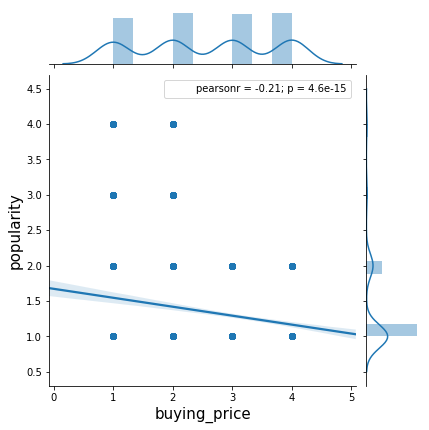

<Figure size 864x720 with 0 Axes>

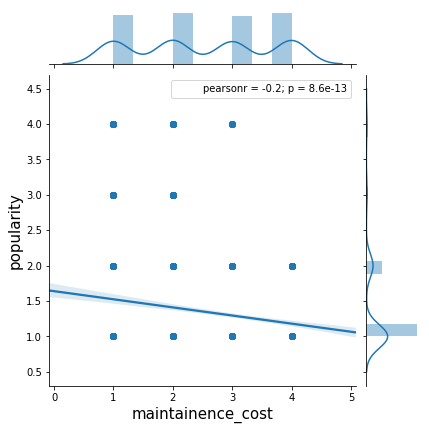

<Figure size 864x720 with 0 Axes>

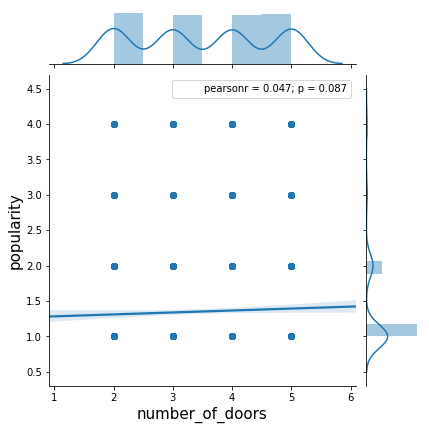

<Figure size 864x720 with 0 Axes>

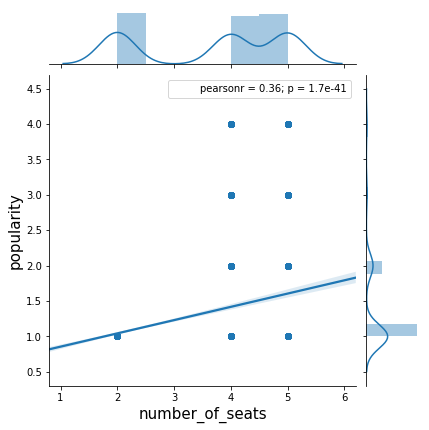

<Figure size 864x720 with 0 Axes>

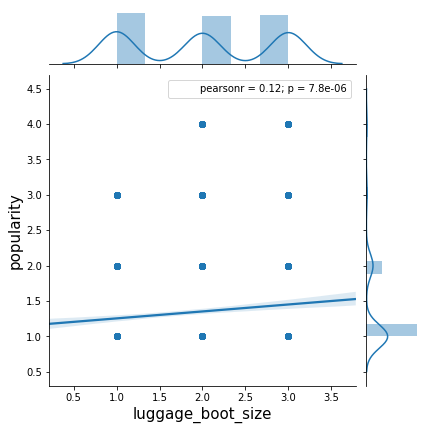

<Figure size 864x720 with 0 Axes>

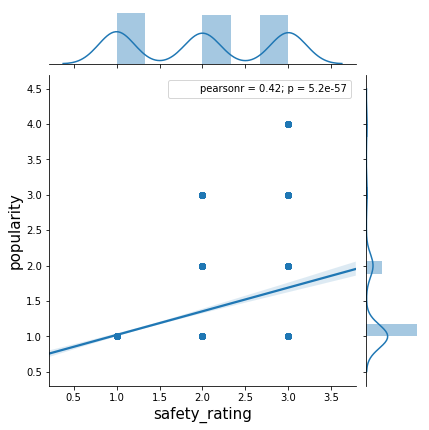

<Figure size 864x720 with 0 Axes>

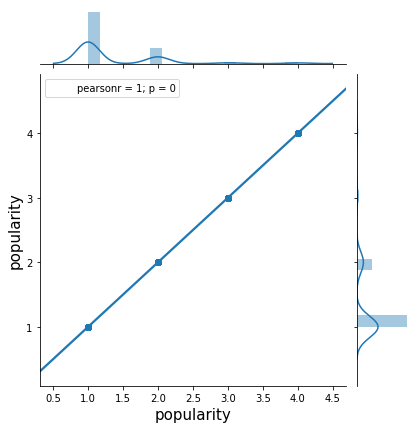

In [74]:
for col in train_data[:-1]:
    plt.figure(figsize=(12,10))
    sns.jointplot(x = train_data[col],y = train_data["popularity"],kind="reg")
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("popularity",fontsize = 15)
    plt.show()

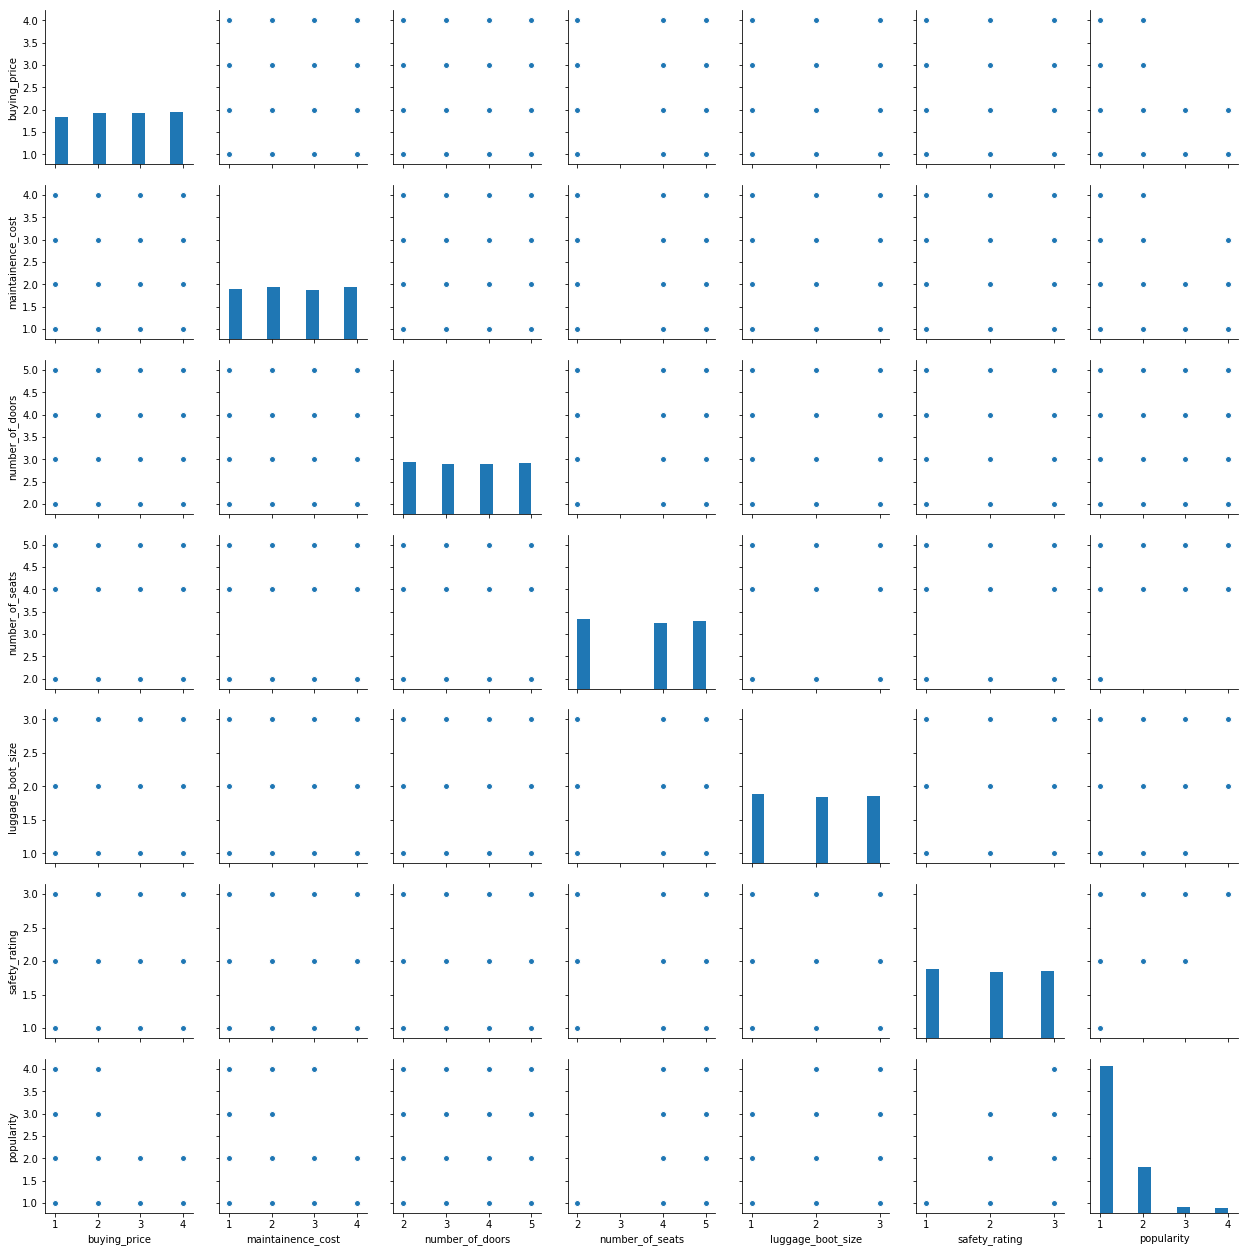

In [77]:
sns.pairplot(train_data)
plt.show()

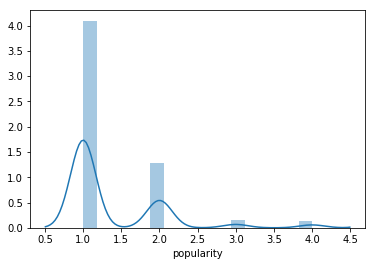

In [78]:
sns.distplot(train_data['popularity']);

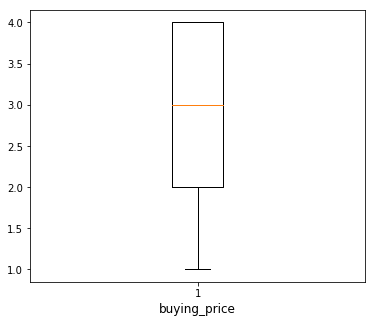

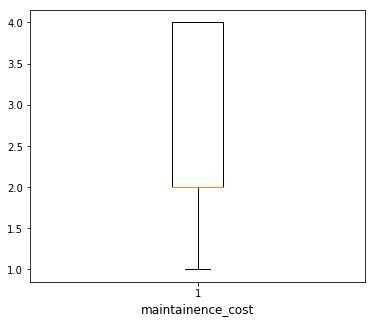

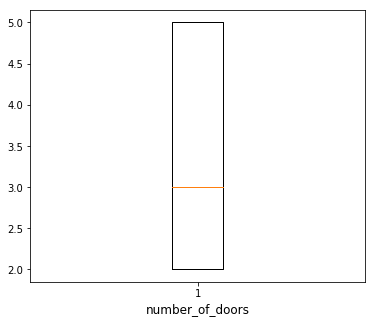

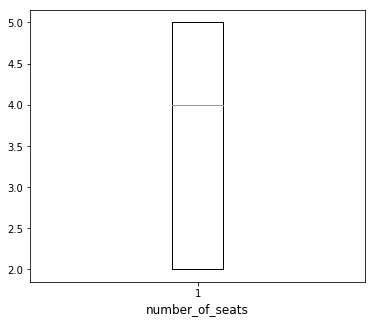

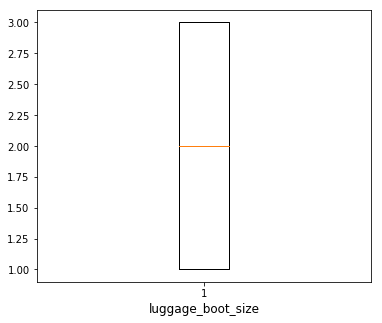

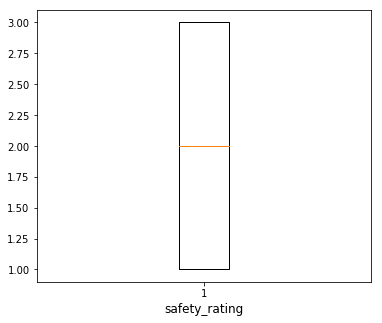

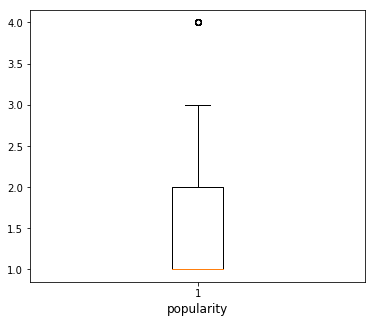

In [87]:
for col in train_data:
    plt.figure(figsize=(6,5))
    plt.boxplot(train_data[col])
    
    plt.xlabel(col,fontsize=12)
    plt.show()

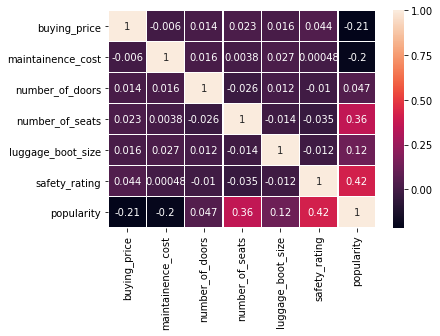

In [12]:
#finding Correlation
sns.heatmap(train_data.corr(),annot = True,linewidths=0.5)
plt.show()

# Train-Test Split

In [13]:
X = train_data.drop('popularity',axis=1)

In [14]:
y = train_data[['popularity']]

In [15]:
test= test_data

In [16]:
X.head()

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating
0,3,4,5,4,2,2
1,2,3,5,4,2,2
2,3,3,3,4,3,2
3,3,2,4,4,2,3
4,1,4,3,5,1,3


In [17]:
y.head()

,popularity
0,1
1,2
2,2
3,2
4,2


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [21]:
X_train.shape ,X_test.shape

((1041, 6), (261, 6))

In [22]:
y_train.shape , y_test.shape

((1041, 1), (261, 1))

# Model Building

## 1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logReg = LogisticRegression()

In [25]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
logReg.intercept_

array([ 7.82506788, -6.67824639, -1.46132774, -3.63540054])

In [27]:
logReg.coef_

array([[ 0.90203958,  0.73124665, -0.03689145, -1.38623614, -0.38626692,
        -2.04550089],
       [-0.33855517, -0.26325724, -0.04802402,  0.97206003,  0.19122956,
         1.33401539],
       [-1.99508374, -1.74911884,  0.15402299,  0.72464889, -0.33528967,
         0.89458982],
       [-1.7464047 , -1.17702136, -0.21402855,  0.41189571,  0.80068888,
         1.26254057]])

In [28]:
predicted = logReg.predict(X_test)

In [29]:
logReg.score(X_train, y_train)

0.829971181556196

In [30]:
logReg.score(X_test, y_test)

0.8084291187739464

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test,predicted)

array([[182,   9,   0,   1],
       [ 24,  29,   1,   0],
       [  0,   6,   0,   0],
       [  0,   9,   0,   0]], dtype=int64)

In [33]:
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          1       0.88      0.95      0.91       192
          2       0.55      0.54      0.54        54
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00         9

avg / total       0.76      0.81      0.78       261



In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(logReg , X_test ,predicted , scoring = 'accuracy' , cv =9)
print(" Mean accuracy of the model is " , np.mean(score)*100)

 Mean accuracy of the model is  89.33886302567554


# 2. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
RandFor = RandomForestClassifier(n_estimators=100)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 40)

In [39]:
RandFor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
prediction = RandFor.predict(X_test)

In [41]:
confusion_matrix(y_test,prediction)

array([[184,   3,   0,   0],
       [  0,  56,   0,   0],
       [  0,   3,   8,   0],
       [  0,   1,   0,   6]], dtype=int64)

In [42]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          1       1.00      0.98      0.99       187
          2       0.89      1.00      0.94        56
          3       1.00      0.73      0.84        11
          4       1.00      0.86      0.92         7

avg / total       0.98      0.97      0.97       261



In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandFor , X_test ,prediction , scoring = 'accuracy' , cv =9)
print(" Mean accuracy of the model is " , np.mean(score)*100)

 Mean accuracy of the model is  91.57726692209451


# 3. Adaboost Classifier

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
classifier = AdaBoostClassifier()

In [104]:
classifier.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [105]:
Ada_pred = classifier.predict(X_test)

In [106]:
confusion_matrix(y_test,Ada_pred)

array([[178,   9,   0,   0],
       [ 19,  35,   1,   1],
       [  0,   6,   5,   0],
       [  0,   1,   0,   6]], dtype=int64)

In [107]:
print(classification_report(y_test,Ada_pred))

             precision    recall  f1-score   support

          1       0.90      0.95      0.93       187
          2       0.69      0.62      0.65        56
          3       0.83      0.45      0.59        11
          4       0.86      0.86      0.86         7

avg / total       0.85      0.86      0.85       261



In [108]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier , X_test ,Ada_pred , scoring = 'accuracy' , cv =9)
print(" Mean accuracy of the model is " , np.mean(score)*100)

 Mean accuracy of the model is  96.56853434631212


# 4. SVM

In [44]:
from sklearn import svm

In [45]:
svm = svm.SVC()

In [46]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
pred = svm.predict(X_test)

In [48]:
svm.score(X_train, y_train)

0.9692603266090298

In [49]:
svm.score(X_test, y_test)

0.9310344827586207

In [50]:
confusion_matrix(y_test,pred)

array([[182,   5,   0,   0],
       [  4,  52,   0,   0],
       [  0,   7,   4,   0],
       [  0,   2,   0,   5]], dtype=int64)

In [51]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.98      0.97      0.98       187
          2       0.79      0.93      0.85        56
          3       1.00      0.36      0.53        11
          4       1.00      0.71      0.83         7

avg / total       0.94      0.93      0.93       261



In [52]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svm , X_test ,pred , scoring = 'accuracy' , cv =9)
print(" Mean accuracy of the model is " , np.mean(score)*100)

 Mean accuracy of the model is  91.62206488494957


# 5. DECISION TREE

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
des = DecisionTreeClassifier()

In [55]:
des.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
des_pred = des.predict(X_test)

In [57]:
des.score(X_train, y_train)

1.0

In [58]:
des.score(X_test, y_test)

0.9386973180076629

In [59]:
confusion_matrix(y_test,des_pred)

array([[180,   7,   0,   0],
       [  0,  54,   2,   0],
       [  0,   4,   7,   0],
       [  0,   1,   2,   4]], dtype=int64)

In [60]:
print(classification_report(y_test,des_pred))

             precision    recall  f1-score   support

          1       1.00      0.96      0.98       187
          2       0.82      0.96      0.89        56
          3       0.64      0.64      0.64        11
          4       1.00      0.57      0.73         7

avg / total       0.95      0.94      0.94       261



In [61]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(des , X_test ,des_pred , scoring = 'accuracy' , cv =9)
print(" Mean accuracy of the model is " , np.mean(score)*100)

 Mean accuracy of the model is  88.1131886693622


### Checking the model for actual Test data

### Random Forest

In [66]:
ran_pred_final = svm.predict(test)

In [67]:
ran_pred_final

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 4, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,

In [68]:
sample_submission = pd.DataFrame({'Popularity':ran_pred_final})

In [69]:
sample_submission.to_csv('RandomForest_Prediction.csv',index = False)

### AdaBoost

In [109]:
ada_pred_final = classifier.predict(test)

In [110]:
ada_pred_final

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 4, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1,
       2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 3,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 4, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1,

In [111]:
sample_submission = pd.DataFrame({'Popularity':ada_pred_final})

In [112]:
sample_submission.to_csv('AdaBoost_Prediction.csv',index = False)

### SVM

In [70]:
svm_pred_final = svm.predict(test)

In [71]:
svm_pred_final

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 4, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,

In [72]:
sample_submission = pd.DataFrame({'Popularity':svm_pred_final})

In [73]:
sample_submission.to_csv('SVM_Prediction.csv',index = False)

## As a result we can say, Adaboost Classifier is the great fit to this dataset, gives 96% accuracy. SVM and Random Forest Models are working very good on this Dataset. It gives approx 92% of accuracy which is quite good.